In [ ]:
# importing modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
os.getcwd()

'/content'

In [ ]:
# load data
import zipfile
with zipfile.ZipFile("image_dataset.zip", 'r') as zip_ref:
        zip_ref.extractall()
data = tf.keras.utils.image_dataset_from_directory('img', label_mode='categorical', image_size=(64, 64), color_mode='grayscale')

Found 6436 files belonging to 5 classes.


In [ ]:
# scale data to be from 0 to 1
print(len(data))
data = data.map(lambda image, label: (image/255, label))
print(len(data))



202
202


In [ ]:
# train test val split
train = data.take(int(len(data)*.6))
val = data.skip(int(len(data)*.6)).take(int(len(data)*.2))
test = data.skip(int(len(data)*.8)).take(int(len(data)*.2))

In [ ]:
len(data)

202

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(30, (3,3), 1, activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D())

model.add(Conv2D(15, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['F1Score', 'accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 15)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 15)        0         
                                                                 
 flatten (Flatten)           (None, 2940)              0

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
121/121 [==============================] - 8s 21ms/step - loss: 0.6519 - f1_score: 0.7423 - accuracy: 0.7448 - val_loss: 0.1691 - val_f1_score: 0.9476 - val_accuracy: 0.9461
Epoch 2/20
121/121 [==============================] - 2s 19ms/step - loss: 0.1291 - f1_score: 0.9593 - accuracy: 0.9597 - val_loss: 0.0934 - val_f1_score: 0.9739 - val_accuracy: 0.9727
Epoch 3/20
121/121 [==============================] - 2s 14ms/step - loss: 0.0977 - f1_score: 0.9721 - accuracy: 0.9724 - val_loss: 0.0704 - val_f1_score: 0.9769 - val_accuracy: 0.9766
Epoch 4/20
121/121 [==============================] - 4s 31ms/step - loss: 0.0607 - f1_score: 0.9800 - accuracy: 0.9801 - val_loss: 0.0614 - val_f1_score: 0.9782 - val_accuracy: 0.9773
Epoch 5/20
121/121 [==============================] - 2s 19ms/step - loss: 0.0484 - f1_score: 0.9843 - accuracy: 0.9845 - val_loss: 0.0426 - val_f1_score: 0.9849 - val_accuracy: 0.9844
Epoch 6/20
121/121 [==============================] - 2s 19ms/step - loss: 

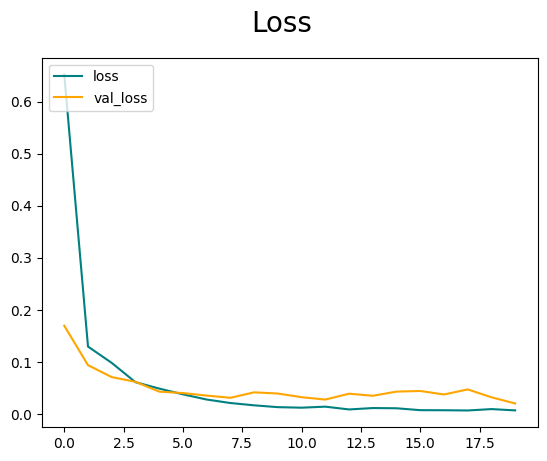

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.evaluate(test)

40/40 [==============================] - 1s 6ms/step - loss: 0.0272 - f1_score: 0.9922 - accuracy: 0.9922


[0.027185726910829544,
 array([0.9904398 , 0.98479086, 0.9856851 , 1.        , 1.        ],
       dtype=float32),
 0.9921875]

In [ ]:

import cv2

1/1 [==============================] - 0s 181ms/step


array([[6.0428749e-04, 9.9936920e-01, 2.4107567e-05, 2.4661392e-06,
        2.2489536e-08]], dtype=float32)

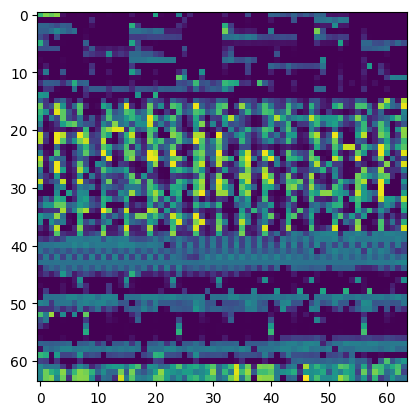

In [ ]:
img = cv2.imread('img/encodea/dled_encodea_0.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
yhat = model.predict(np.expand_dims(img/255, 0))
yhat

In [ ]:
model.save(os.path.join('models','obf_classifier.keras'))